In [1]:
import os
import pandas as pd
import seaborn as sns
import numpy as np


In [2]:
# Load the data
file_path = '~/PycharmProjects/Data-Management-and-Database-Design/Assignment_1/scraper/raw_data/allstar_games.csv'
allstar_games = pd.read_csv(file_path)
print(allstar_games.head(5))

   Unnamed: 0        DATE WINNING_TEAM  WINNING_SCORE   LOSING_TEAM  \
0           1  02/18/2018  Team LeBron            148  Team Stephen   
1           2  02/19/2017         West            192          East   
2           3  02/14/2016         West            196          East   
3           4  02/15/2015         West            163          East   
4           5  02/16/2014         East            163          West   

   LOSING_SCORE                                  VENUE                MVP  
0           145        Staples Center, Los Angeles, CA       LeBron James  
1           182  Smoothie King Center, New Orleans, LA      Anthony Davis  
2           173             Air Canada Centre, Toronto  Russell Westbrook  
3           158   Madison Square Garden, Manhattan, NY  Russell Westbrook  
4           155  Smoothie King Center, New Orleans, LA       Kyrie Irving  


Note that first column does not have any name. We will make this row into an unique ID for each game

In [3]:
allstar_games.dtypes

Unnamed: 0        int64
DATE             object
WINNING_TEAM     object
WINNING_SCORE     int64
LOSING_TEAM      object
LOSING_SCORE      int64
VENUE            object
MVP              object
dtype: object

In [4]:
allstar_games.rename(columns = {allstar_games.columns[0]:'GAME_ID'}, inplace=True)
print(allstar_games.columns)

Index(['GAME_ID', 'DATE', 'WINNING_TEAM', 'WINNING_SCORE', 'LOSING_TEAM',
       'LOSING_SCORE', 'VENUE', 'MVP'],
      dtype='object')


In [5]:
# Sort and edit th GAME_ID

allstar_games = allstar_games.sort_values(by = ['GAME_ID'] , ascending = False)

allstar_games = allstar_games.reset_index(drop=True)

for i in range (0,allstar_games.shape[0]): 
    allstar_games.iat[i,0] = i+1
    
print(allstar_games.head())


   GAME_ID        DATE WINNING_TEAM  WINNING_SCORE LOSING_TEAM  LOSING_SCORE  \
0        1  03/02/1951         East            111        West            94   
1        2  02/11/1952         East            108        West            91   
2        3  01/13/1953         West             79        East            75   
3        4  01/21/1954         East             98        West            93   
4        5  01/18/1955         East            100        West            91   

                                               VENUE           MVP  
0                          Boston Garden, Boston, MA   Ed Macauley  
1                          Boston Garden, Boston, MA   Paul Arizin  
2  Allen County War Memorial Coliseum, Fort Wayne...  George Mikan  
3               Madison Square Garden, Manhattan, NY     Bob Cousy  
4               Madison Square Garden, Manhattan, NY  Bill Sharman  


In [6]:
allstar_games.count()

GAME_ID          67
DATE             67
WINNING_TEAM     67
WINNING_SCORE    67
LOSING_TEAM      67
LOSING_SCORE     67
VENUE            67
MVP              67
dtype: int64

In [7]:
allstar_games.apply(lambda x: sum(x.isnull()),axis=0)

GAME_ID          0
DATE             0
WINNING_TEAM     0
WINNING_SCORE    0
LOSING_TEAM      0
LOSING_SCORE     0
VENUE            0
MVP              0
dtype: int64

Identify placeholder data

In [8]:
print(allstar_games.describe())

         GAME_ID  WINNING_SCORE  LOSING_SCORE
count  67.000000      67.000000     67.000000
mean   34.000000     132.686567    122.014925
std    19.485037      20.053118     19.746494
min     1.000000      79.000000     75.000000
25%    17.500000     122.500000    111.000000
50%    34.000000     134.000000    120.000000
75%    50.500000     143.500000    132.000000
max    67.000000     196.000000    182.000000


In [9]:
print(allstar_games.describe(include=[np.object]))

              DATE WINNING_TEAM LOSING_TEAM  \
count           67           67          67   
unique          67            3           3   
top     01/15/1974         East        West   
freq             1           37          37   

                                       VENUE              MVP  
count                                     67               67  
unique                                    48               51  
top     Madison Square Garden, Manhattan, NY  Oscar Robertson  
freq                                       5                3  


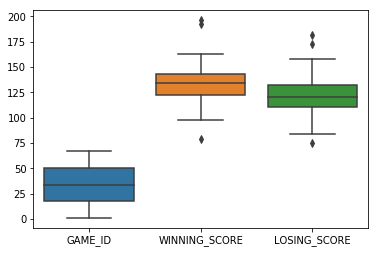

In [10]:
sns.boxplot(data=allstar_games)

In [11]:
print(allstar_games.loc[allstar_games['WINNING_SCORE'] > 175])

    GAME_ID        DATE WINNING_TEAM  WINNING_SCORE LOSING_TEAM  LOSING_SCORE  \
64       65  02/14/2016         West            196        East           173   
65       66  02/19/2017         West            192        East           182   

                                    VENUE                MVP  
64             Air Canada Centre, Toronto  Russell Westbrook  
65  Smoothie King Center, New Orleans, LA      Anthony Davis  


In [12]:
print(allstar_games.loc[allstar_games['WINNING_SCORE'] < 100])

   GAME_ID        DATE WINNING_TEAM  WINNING_SCORE LOSING_TEAM  LOSING_SCORE  \
2        3  01/13/1953         West             79        East            75   
3        4  01/21/1954         East             98        West            93   

                                               VENUE           MVP  
2  Allen County War Memorial Coliseum, Fort Wayne...  George Mikan  
3               Madison Square Garden, Manhattan, NY     Bob Cousy  


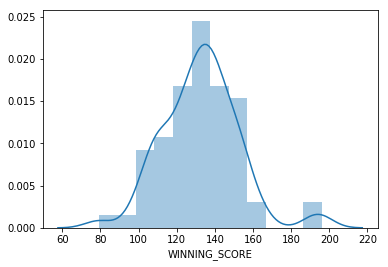

In [14]:
sns.distplot(allstar_games['WINNING_SCORE'])

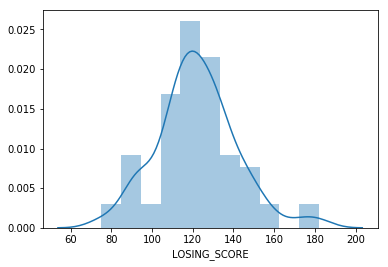

In [15]:
sns.distplot(allstar_games['LOSING_SCORE'])